## Background

Walmart is an American multinational retail corporation and the word largest retailer, has been in existence since 1962. Over the years, Walmart has built a strong and influencing brand, known for its low prices, wide selection of product and their commitment to customers. Walmart business model is based on providing values to its customer through cost savings and efficiency, this model is achieved through strategies such as bulk purchase, lean supply chain management and advance technology


## Business objectives
The objective of this project is to build a model which can be used to predict weekly sales for Walmart stores and department, and be able to make better future plans, limit the problem of overstocking and understocking, achieving projected targets and deciding on the best investment

## Data Dictionary
* Store: The differe t store represented numerical values between 1-45
* Type: Store type represented with A, B and C
* Dept: Department in the store represented in numerical values
* MarkDown: There are 5 markdown which represent the promotional sales 
* IsHoliday: Stare when there is holidays it is represented with true meaning there is holiday and false no holiday
* unemployment:represented in float
* Temperature: Measured in Celsius
* CPI:Consumers price index represented in float
* Weekly_Sales: department weekly sales represented in dolars

## Importing Necessary Libraries

In [1]:
# Pandas for DataFrames
import pandas as pd
# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 
# Seaborn for visualization
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, confusion_matrix, plot_roc_curve
from sklearn.metrics import roc_curve, auc

## I. Exploratory Data Analysis

In [2]:
df_store = pd.read_csv('stores_ML.csv')
df_store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


The stores where grouped into A, B and C which is base of on the size, A being the store with larger size 
follow BY B and then C

In [3]:
df_test = pd.read_csv('test_ML.csv')
df_test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
df_features = pd.read_csv('features_ML.csv')
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df_train = pd.read_csv('train_ML.csv')
df_train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
#Merge the datasets based on a common column
df1 = pd.merge(df_train, df_features, on=['Store', 'Date'])
df1.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [7]:
df2 = pd.merge(df1, df_store, on=['Store'])
df2.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [8]:
# Drop a column because there were two columns with same values name IsHoliday
df2 = df2.drop('IsHoliday_x', axis=1)

In [9]:
# Rename a column
df2 = df2.rename(columns={'IsHoliday_y': 'IsHoliday'})
df2.head(10)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
5,1,6,2010-02-05,5749.03,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
6,1,7,2010-02-05,21084.08,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
7,1,8,2010-02-05,40129.01,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
8,1,9,2010-02-05,16930.99,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
9,1,10,2010-02-05,30721.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
# Description of the dataset showing the numerical features
df2.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [11]:
df2.describe(include='object') #showing categorical features

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


In [12]:
df2.info() #showing the general informationa about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


There are missing values in the 5 markdown, Notice all 5 Markdown has below 421570 entries.

In [13]:
df2.shape # showing the shape of the dataset

(421570, 16)

The data sett has 421570 observations and 16 unique features

In [14]:
duplicate_count = df2.duplicated().sum() #checking for duplicate values in the dataset
duplicate_count

0

No duplicates was found

In [15]:
df2.isnull().sum() #checking for missing values in the dataset

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
dtype: int64

There are null values in all 5 markdown, it was also observed when we ran the .info 

In [16]:
#filling nun values with 0
df2 = df2.fillna(0) # filling null's with 0

We decided to fill the null values with zeros because markdowns signifies the day days 
where walmart had promotional sales, so the null values represent days without promotional 
sales or discount, so they were replaced with zeros

In [17]:
df2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [18]:
df2['Store'].nunique() # number of different values

45

They are 45 stores in the data set

In [19]:
df2['Dept'].nunique() # number of different values

81

The data set has 81 department

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Having replaced the null values in the all markdown, all observations are complete, no null values

In [21]:
#this is used to check for negative valued in the target varible in the dataset and if there are any it will be dropped, due to the fact there cannot be negative values for sales in any of the store and departments for sales 
for value in df2['Weekly_Sales']:
    if value < 0:
        print("Negative value found: ", value)

Negative value found:  -863.0
Negative value found:  -698.0
Negative value found:  -58.0
Negative value found:  -50.0
Negative value found:  -298.0
Negative value found:  -15.0
Negative value found:  -198.0
Negative value found:  -498.0
Negative value found:  -498.0
Negative value found:  -198.0
Negative value found:  -21.0
Negative value found:  -199.0
Negative value found:  -223.0
Negative value found:  -1.27
Negative value found:  -139.65
Negative value found:  -3.0
Negative value found:  -118.0
Negative value found:  -0.98
Negative value found:  -1098.0
Negative value found:  -498.0
Negative value found:  -1098.0
Negative value found:  -6.16
Negative value found:  -1098.0
Negative value found:  -159.0
Negative value found:  -147.0
Negative value found:  -2.0
Negative value found:  -219.0
Negative value found:  -20.0
Negative value found:  -38.0
Negative value found:  -22.5
Negative value found:  -88.0
Negative value found:  -4.0
Negative value found:  -32.0
Negative value found:  -

Checking for negative values for weekly sales, having a negative value for weekly 
sales should be consider a noise, its not possible for a department in warmart not to make sales 
in a week or have a negative value 


In [22]:
#dropping the values less than 0 and saving it to the dataset 
df = df2.loc[df2['Weekly_Sales'] > 0]

dropped the weekly sales with negative values

In [23]:
df.shape

(420212, 16)

After dropping the negative value the data set now has 420212 observations and fetures still remains 16

In [24]:
# printing out the start date and end date of the dataset the date column
pd.concat([df['Date'].head(5), df['Date'].tail(5)])

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

The dataset id from 2010-10-05 to 2012-10-26

In [25]:
#Filter the DataFrame to only include holiday sales
df_holiday = df.loc[df['IsHoliday']==True]

#Get the unique dates from the 'Date' column in the holiday sales DataFrame
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [26]:
# Converting the date to date time
df['Date'] = pd.to_datetime(df2['Date'])
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [27]:
#To check the months and years which has the best weekly sales
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

Grouping the week sales of the department by month and getting the average sales for per month, December which is the 12th month has the highest avearage sales

In [28]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

Grouping the week sales of the department by year and getting the average sales for per year

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

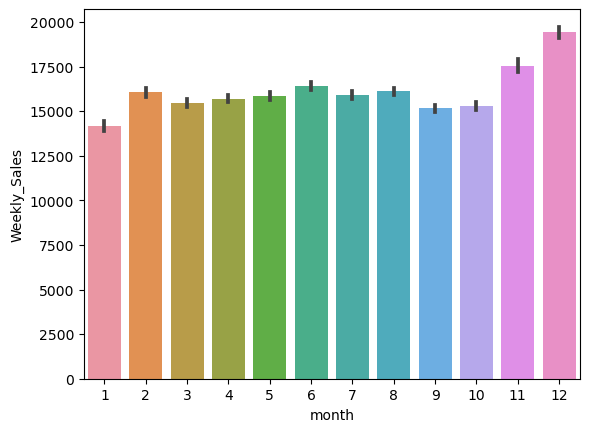

In [29]:
sns.barplot(x='month', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

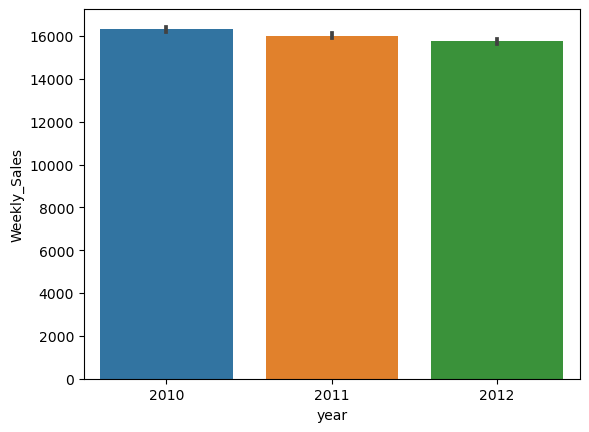

In [30]:
sns.barplot(x='year', y='Weekly_Sales', data=df)

notice for the three years, the sales were slightly different

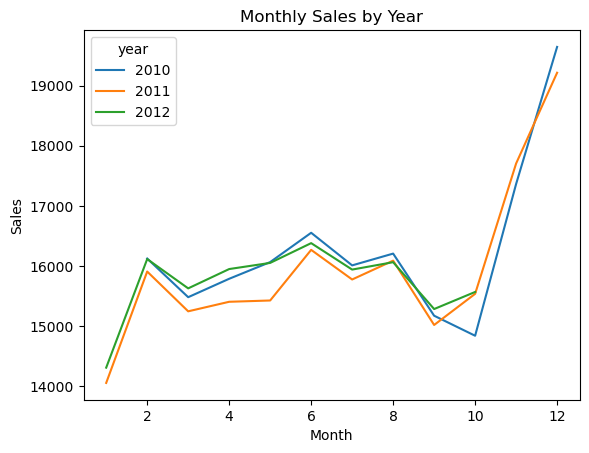

In [31]:
# Create pivot table of monthly sales by year
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")

# Create line chart
monthly_sales.plot()

# Set the chart title and labels for the x and y axes
plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Sales")

# Display the chart
plt.show()

In [32]:
# Group the DataFrame by week and calculate mean sales
weekly_sales = df.groupby('week')['Weekly_Sales'].mean()

# Sort the resulting Series in descending order and display the top 5 rows
top_weekly_sales = weekly_sales.sort_values(ascending=False).head()

print(top_weekly_sales)

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64


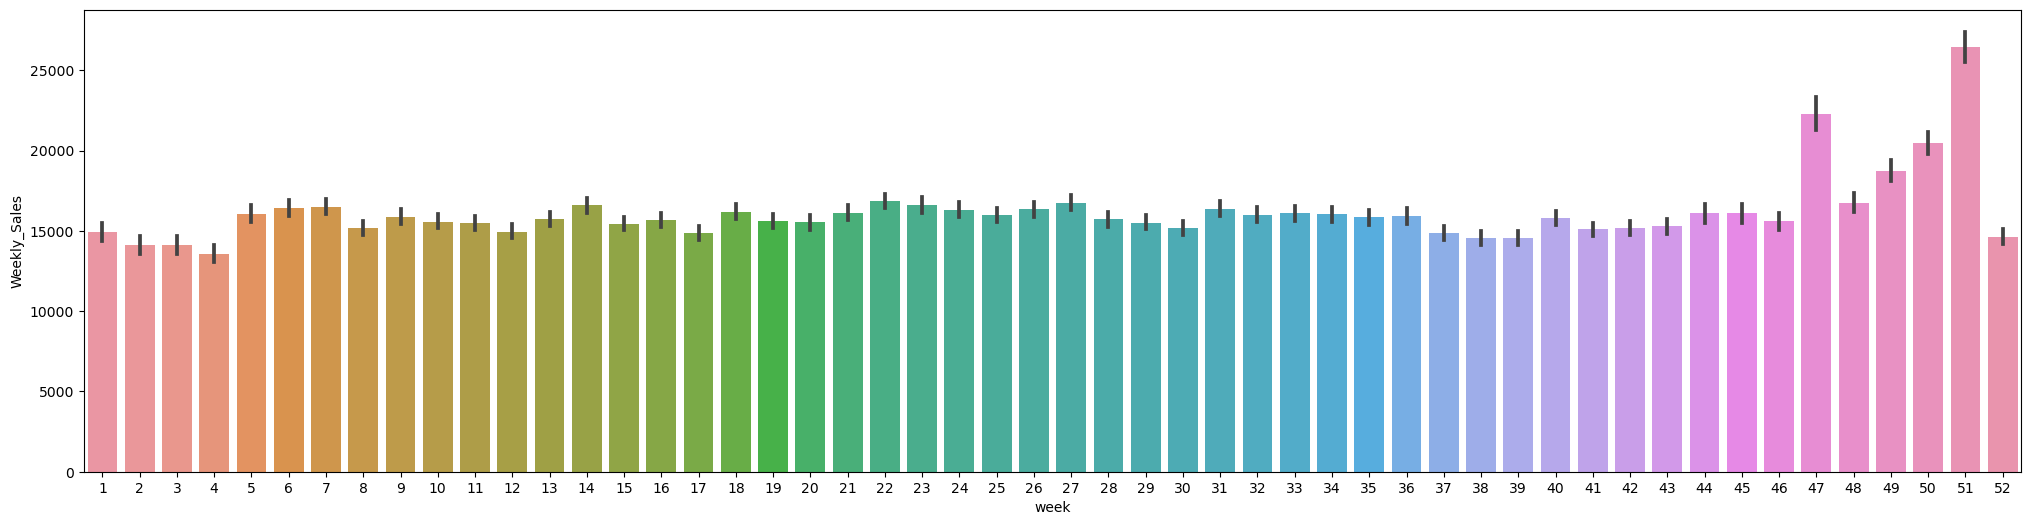

In [33]:
plt.figure(figsize=(25, 6))
fig= sns.barplot(x='week', y='Weekly_Sales', data=df)

Chart of weekly sales fror the year, and the week 51 hasthe highest sales, this is due to 
Thanks giving and christmas celebration, week 51 and 47 have higher values and 50-48 weeks follow them

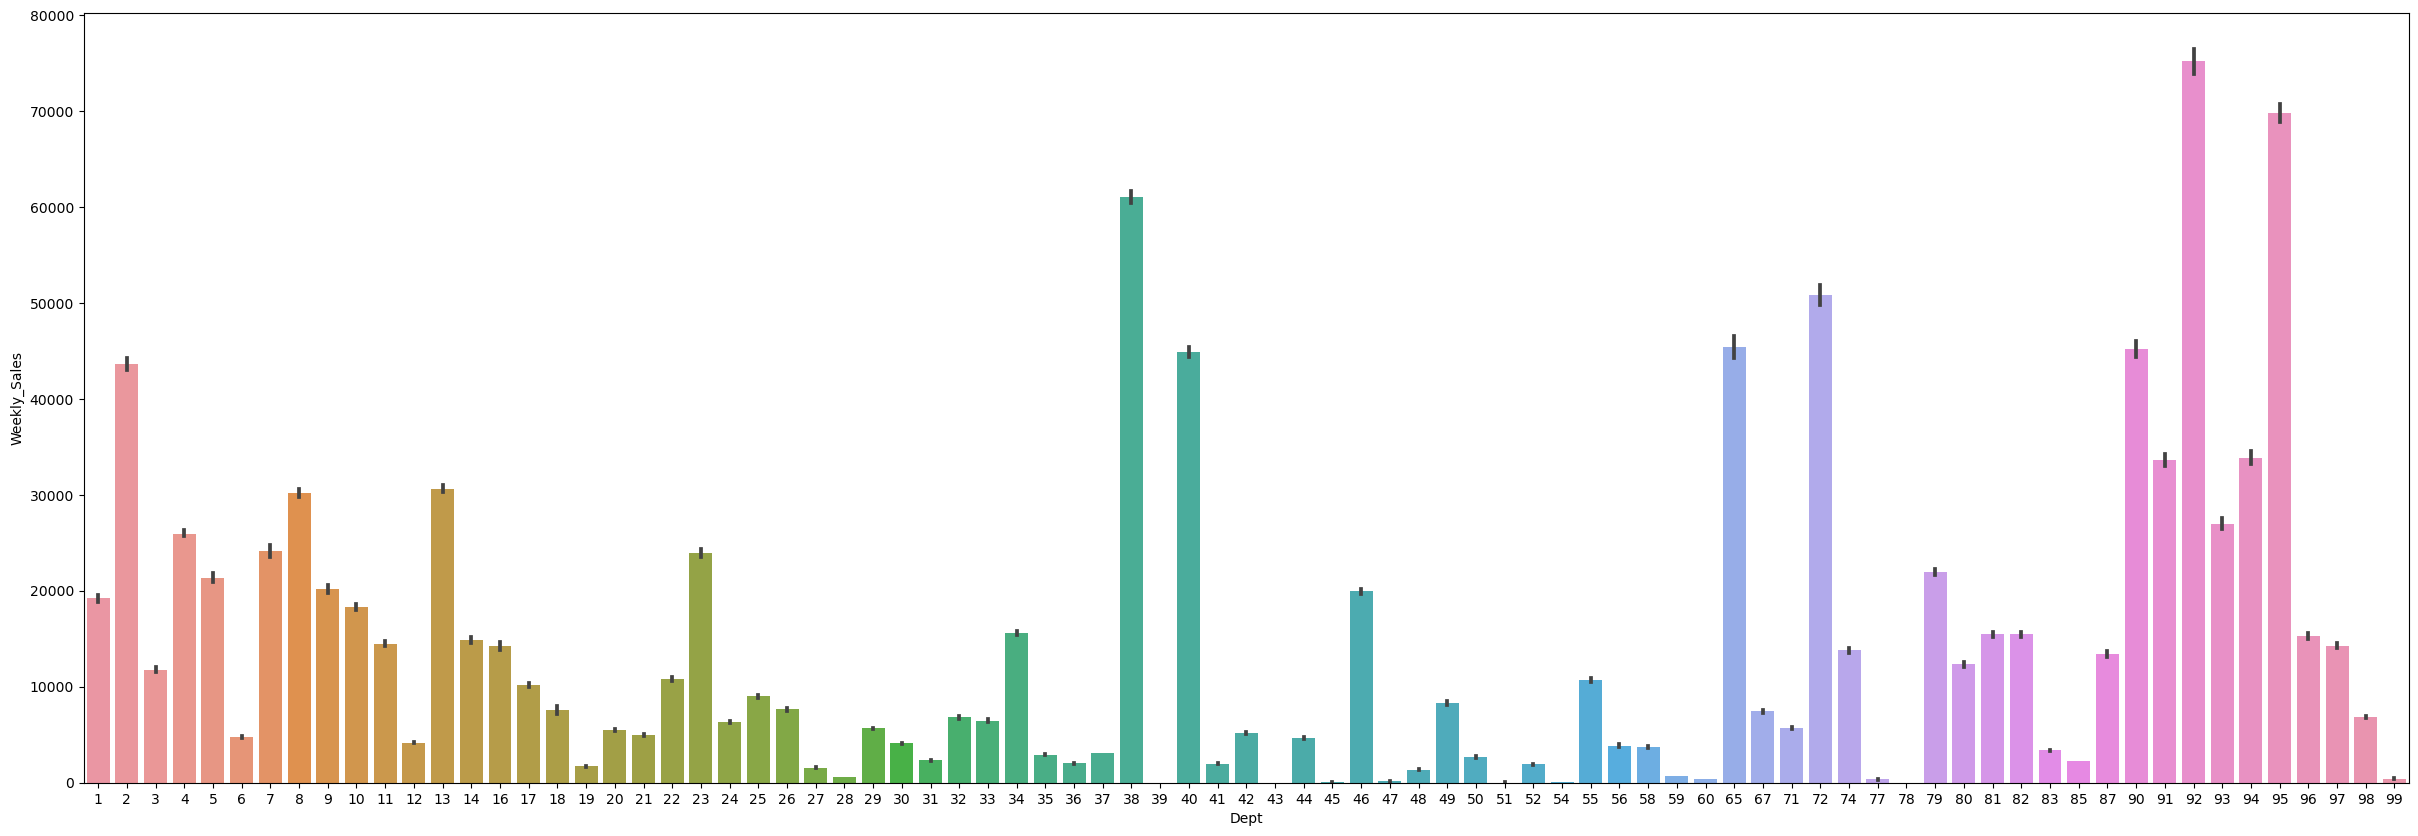

In [34]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

From the chat, it is seen that department 92 has higher mean sales.

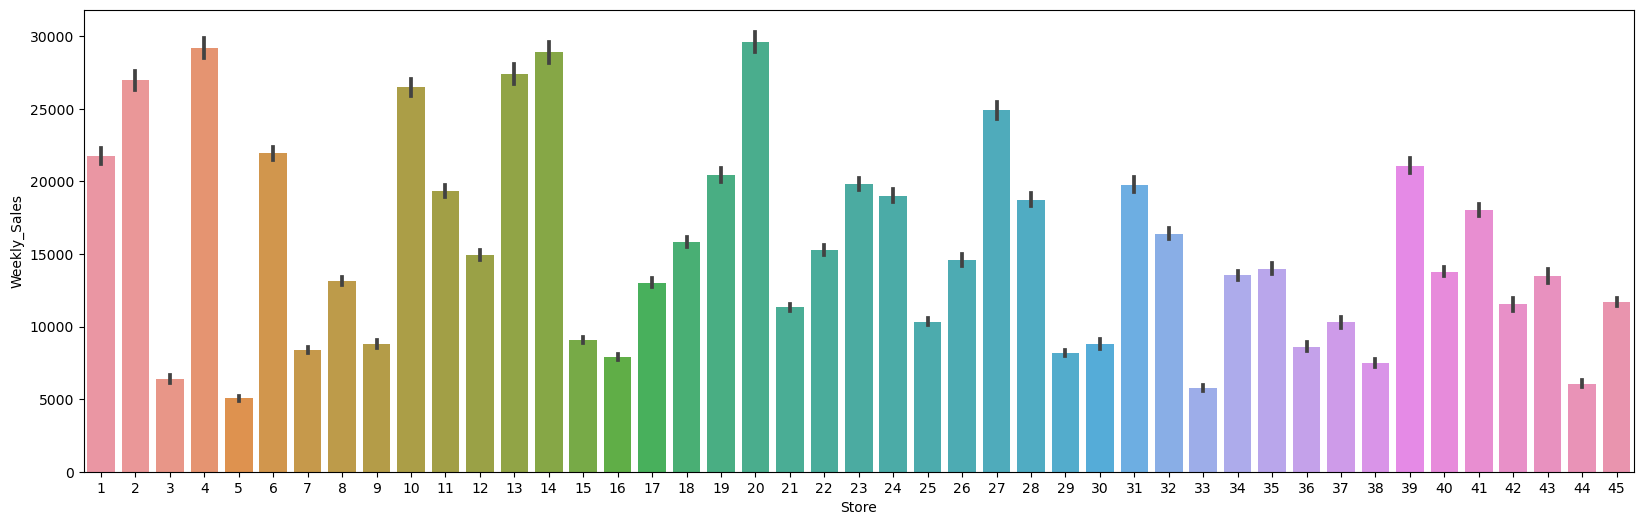

In [35]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [36]:
df.to_csv('cleaned_data_ML.csv', index=None)

In [37]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,43,10,2012


## Findings and Explorations

### Cleaning Process

* The data has no too much nan values. All columns was checked.
* I choose rows which has higher than 0 weekly sales. Minus values are 0.3% of data. So, I dropped them.
* Null values in markdowns changed to zero. Because, they were written as null if there were no markdown on this department.

### Explorations & Findings

* There are 45 stores and 81 department in data. Departments are not same in all stores.
* Although department 72 has higher weekly sales values, on average department 92 is the best. 
It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant 
when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time.
* Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 
4 are on the first and second rank. It means that some areas has higher seasonal sales.
* Stores has 3 types as A, B and C according to their sizes they were replaced with 1,2, and 3 
* Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012.
* It is seen that week 51 and 47 have higher values and 50-48 weeks follow them.
* Sales for January are significantly less when compared to other months, but december had the highest average 
sales follow by november, After two high sales month,it seems people prefer to pay less on January.
* CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

## II. Feature engineering

#### Encoding the data

In [38]:
 # Keep original dataframe taking copy of it
df_encoded = df.copy()

In [39]:
# replace type of the stores from A, B, C to 1, 2, 3
type_group = {'A':1, 'B': 2, 'C': 3}
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [40]:
# change holidays boolean values to 0-1 
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(int) 
df_encoded

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,151315,5,2,2010
1,1,2,2010-02-05,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,151315,5,2,2010
2,1,3,2010-02-05,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,151315,5,2,2010
3,1,4,2010-02-05,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,151315,5,2,2010
4,1,5,2010-02-05,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,2,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,2,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,2,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,2,118221,43,10,2012


Changing the holiday values to 1 and 0, i=1 signify's there is holidays and 0 signifies no holiday 

<AxesSubplot:>

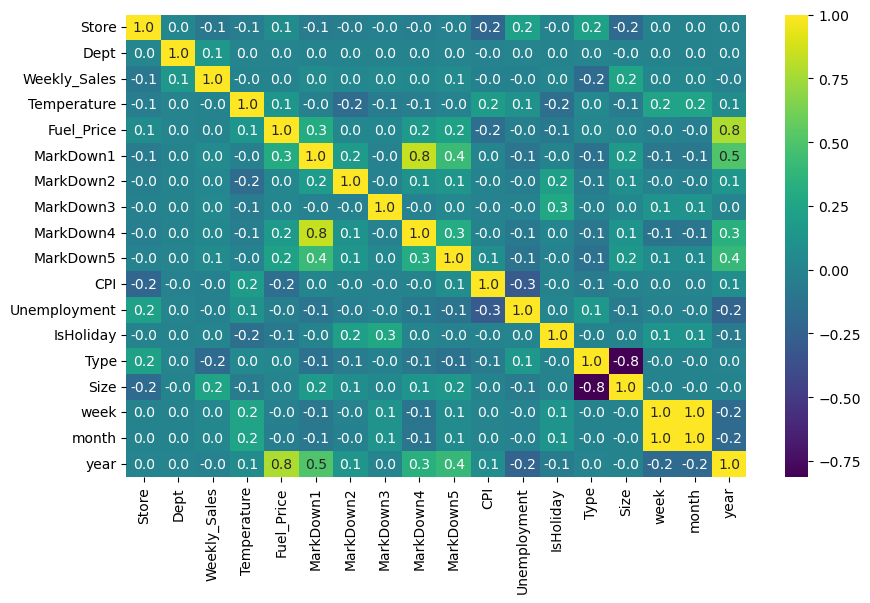

In [41]:
# Correlation matrix 
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis', fmt='.1f')

 Temperature, unemployment, CPI have no significant effect on weekly sales. Markdown 4 and Markdown 1 are highly correlated. We will drop all of them

In [42]:
# dropping columns; 
drop_col = ['Temperature','Unemployment','CPI','MarkDown4','MarkDown1', 'Date']
df_encoded.drop(drop_col, axis=1, inplace=True) 

In [43]:
df_encoded.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
Fuel_Price      float64
MarkDown2       float64
MarkDown3       float64
MarkDown5       float64
IsHoliday         int64
Type              int64
Size              int64
week              int64
month             int64
year              int64
dtype: object

checking the data type for each feature

### Data partition

In [44]:
scaler= StandardScaler()

# Separate the input features and target variable
x = df_encoded.drop('Weekly_Sales',axis=1)
y = df_encoded['Weekly_Sales']
 


In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Store       420212 non-null  int64  
 1   Dept        420212 non-null  int64  
 2   Fuel_Price  420212 non-null  float64
 3   MarkDown2   420212 non-null  float64
 4   MarkDown3   420212 non-null  float64
 5   MarkDown5   420212 non-null  float64
 6   IsHoliday   420212 non-null  int64  
 7   Type        420212 non-null  int64  
 8   Size        420212 non-null  int64  
 9   week        420212 non-null  int64  
 10  month       420212 non-null  int64  
 11  year        420212 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 41.7 MB


In [46]:
# standardization 
ob = scaler.fit_transform(x) 


In [47]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

### III. Modeling and Evaluation

### Linear Regression Model

In [48]:
# train your model
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression().fit(xtrain, ytrain)

In [49]:
# make preditions on train set
train_pred = lrmodel.predict(xtrain)

In [50]:
# evaluate your model
# Mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae_lr = mean_absolute_error(train_pred, ytrain)
print('Train error is', train_mae_lr)

Train error is 14560.156737662208


In [51]:
# make predictions on test set
ypred = lrmodel.predict(xtest)

#evaluate the model
test_mae_lr = mean_absolute_error(ypred, ytest)
print('Test error is', test_mae_lr)

Test error is 14597.436915682485


### Decision Tree Model

In [52]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [53]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=42)

In [54]:
# train the model
dtmodel = dt.fit(xtrain,ytrain)

In [55]:
# make predictions using the test set
ytest_pred = dtmodel.predict(xtest)

In [56]:
# evaluate the model
test_mae_dt = mean_absolute_error(ytest_pred, ytest)
test_mae_dt

11442.334446235242

### POLYNOMIAL REGRESSION MODEL

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
# Split data into input and target variables
x = df_encoded.drop('Weekly_Sales',axis=1)
y = df_encoded['Weekly_Sales']

In [59]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
# Apply Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
xtrain_poly = poly_reg.fit_transform(xtrain)
xtest_poly = poly_reg.transform(xtest)

In [61]:
# Fit the model
model = LinearRegression()
model.fit(xtrain_poly, ytrain)

LinearRegression()

In [62]:
# Predict sales for test data
y_pred = model.predict(xtest_poly)

In [63]:
# Calculate the mean absolute error
test_mae_dt = mean_absolute_error(y_pred, ytest)
test_mae_dt

12871.584553661589

### Gradient boosting Regressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
# Define the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [66]:
# Fit the model to the training data
gb.fit(xtrain, ytrain)

GradientBoostingRegressor(random_state=42)

In [67]:
# Make predictions on the test data
ypred_gb = gb.predict(xtest)

In [68]:
# Evaluate the model using mean absolute error
mae_gb = mean_absolute_error(ytest, ypred_gb)

In [69]:
mae_gb

7017.339327609215

### Boosting DecisionTreeRegressor, LinearRegressio, PolynomialFeatures 

In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [180]:
# Define base models to be boosted
base_models = [DecisionTreeRegressor(max_depth=3), 
               LinearRegression(),
               PolynomialFeatures()]

In [181]:
# Define AdaBoost model to boost the base models
boosted_model = AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=0.1, loss='linear', random_state=42)

In [182]:
# Train the boosted model on the training data
boosted_model.fit(xtrain, ytrain)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [183]:
# Evaluate the boosted model on the test data
ypred_bm = boosted_model.predict(xtest)
test_mae_boosted = mean_absolute_error(ytest, ypred_bm)
test_mae_boosted

14482.025892582302

### Bagging DecisionTreeRegressor, LinearRegressio, PolynomialFeatures 

In [75]:
from sklearn.ensemble import BaggingRegressor

In [76]:
# Define the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=42)

In [77]:
# Define base models
base_models = [
    DecisionTreeRegressor(max_depth=5),
    LinearRegression(),
    PolynomialFeatures() 
]

In [78]:
# Define bagging model
bagging_model = BaggingRegressor(
    base_estimator=None,  # default is DecisionTreeRegressor
    n_estimators=10,
    max_samples=0.5,
    max_features=0.5,
    random_state=42
)



In [79]:
# Fit bagging model to training data
bagging_model.fit(xtrain, ytrain)

BaggingRegressor(max_features=0.5, max_samples=0.5, random_state=42)

In [80]:
# Evaluate bagging model on test data
ypred_bag = bagging_model.predict(xtest)
mae_bag = mean_absolute_error(ytest, ypred_bag)
mae_bag

8901.9965302171

### Stacking using DecisionTreeRegressor, LinearRegressio, PolynomialFeatures as base models 

In [81]:
from mlxtend.regressor import StackingCVRegressor

In [82]:
# define base models
dt_stacking = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=42)
lr_stacking = LinearRegression()
gb_stacking = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [83]:
# define meta-model
meta_model = LinearRegression()

# define stacking model
stacking_model = StackingCVRegressor(regressors=[dt_stacking, lr_stacking, gb_stacking],
                                     meta_regressor=meta_model,
                                     cv=5,
                                     shuffle=True,
                                     random_state=42)

In [84]:
# fit stacking model on training data
stacking_model.fit(xtrain, ytrain)

StackingCVRegressor(meta_regressor=LinearRegression(), random_state=42,
                    regressors=[DecisionTreeRegressor(max_depth=3,
                                                      max_features=10,
                                                      random_state=42),
                                LinearRegression(),
                                GradientBoostingRegressor(random_state=42)])

In [85]:
# make predictions on testing data
ypred_stack = stacking_model.predict(xtest)


In [86]:
# calculate mean absolute error
mae_stack = mean_absolute_error(ytest, ypred_stack)
mae_stack

6641.670512571827

#### SVM

In [92]:
from sklearn.svm import SVR
import time

In [93]:
svm_model = SVR(kernel='linear')

In [94]:
xtrain_small = xtrain[:1000]  # Use only the first 1000 samples for training

In [95]:
ytrain_small = ytrain[:1000]

In [96]:
start_time = time.time()

In [98]:
svm_model.fit(xtrain_small, ytrain_small)

SVR(kernel='linear')

In [99]:
end_time = time.time()

In [100]:
ypred_svm = svm_model.predict(xtest)
mae_svm = mean_absolute_error(ytest, y_pred)

In [101]:
mae_svm

12871.584553661589

#### Random Forest Model

In [129]:
from sklearn.ensemble import RandomForestRegressor
xtrain_rfsmall = xtrain[:2000]
ytrain_rfsmall = xtrain[:2000]

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
# Create a Random Forest model
rf_model = RandomForestRegressor()

In [132]:
# Fit the model on the training set with only 1000 samples
rfstart_time = time.time()
rf_model.fit(xtrain_rfsmall, ytrain_rfsmall)
rfend_time = time.time()

In [136]:
# Evaluate the model on the test set
ypred_rf= rf_model.predict(xtest)

# Flatten y_pred to one dimension
ypred_rf_flat = y_pred.flatten()


In [137]:
# Calculate mean absolute error
mae_rf = mean_absolute_error(ytest, ypred_rf_flat)

In [138]:
mae_rf

12871.584553661589

Random forest model was taking lots of time to run because of the data size, so i had to reduce the train and test 
to the first 2000 samples, And I had to use. flatten on the ypred  Because I was encountering an error stating the 
ytest and the ypred has different dimension and they have different number of output. I had to use the .flatten() 
to ensure ytest and ypred has same dimensions

### cross validation

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Create a linear regression model
lr_model = LinearRegression() 

In [185]:
#cross validation for linear regression
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

In [186]:
mae_scores_lr = -cross_val_score(lr_model, x, y, cv=cv, scoring='neg_mean_absolute_error')
mae_scores_lr = np.abs(mae_scores_lr) 
mean_mae_lr = np.mean(mae_scores_lr)

In [187]:
# cross validation DT
# Create decision tree regressor model
dt_model = DecisionTreeRegressor()

In [188]:
# Perform cross-validation with decision tree regressor model
mae_scores_dt = -cross_val_score(dt_model, x, y, cv=cv, scoring='neg_mean_absolute_error')
mae_scores_dt = np.abs(mae_scores_dt)
mean_mae_dt = np.mean(mae_scores_dt) 

In [189]:
# cross validation rf
randomf_model = RandomForestRegressor()
mae_scores_rf = -cross_val_score(randomf_model, x, y, cv=cv, scoring='neg_mean_absolute_error')
mae_scores_rf = np.abs(mae_scores_rf)  # Convert negative scores back to positive values
mean_mae_rf = np.mean(mae_scores_rf)  # Compute the mean MAE score

In [190]:
# cross validation svm
svm_model_cv = SVR(kernel='linear')
mae_scores_svm = -cross_val_score(randomf_model, x, y, cv=cv, scoring='neg_mean_absolute_error')
mae_scores_svm = np.abs(mae_scores_svm)  # Convert negative scores back to positive values
mean_mae_svm = np.mean(mae_scores_svm) 

In [191]:
#cross evaluation for Polynomial
poly_model = PolynomialFeatures()
mae_scores_poly = -cross_val_score(poly_model, x, y, cv=cv, scoring='neg_mean_absolute_error')
mae_scores_poly = np.abs(mae_scores_poly)  # Convert negative scores back to positive values
mean_mae_poly = np.mean(mae_scores_poly) 

In [193]:
#cross validation for gradient boosting
gb_model = GradientBoostingRegressor()
mae_scores_gb = -cross_val_score(gb_model, x, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores_gb = np.abs(mae_scores_gb)
mean_scores_gb = np.mean(mae_scores_gb)

In [194]:
# Print MAE scores for all model
print("MAE scores for Linear Regression model: ", rmse_scores_lr.mean())
print("MAE scores for decision tree regressor model: ",rmse_scores_dt.mean())
print("MAE scores for random forest model: ", mse_scores_rf.mean())
print("MAE scores for SVM model: ",mse_scores_svm.mean())
print("MAE scores for Gradientboosting regressor: ",mse_scores_gb.mean())

MAE scores for Linear Regression model:  21719.462949164124
MAE scores for decision tree regressor model:  42.55380339076733
MAE scores for random forest model:  1414.3990572561468
MAE scores for SVM model:  1414.4012237244847
MAE scores for Gradientboosting regressor:  7952.174923104343


After doing cross validation on our models, the best model is decision tree regressor, because it 
has the least mean absolute error.

### After the evaluation of each model, the Decision Tree Model is the best model, because it has the lowest mean absolute error of 42.55380339076733 while training the data.